
# DA5401 Assignment #1 — Visualization: *Uncovering the Story Behind Movie Success*



## Part 1 — Hypothesis

**Hypothesis :**  
> *Higher budgets and star-studded casts correlate with higher revenue, but not necessarily higher user ratings.*  

We will test this hypothesis by:
- Examining relationships between `budget`, `revenue`, `runtime`, and `vote_average`.
- Extracting primary genre, director, and number of lead actors.
- Comparing budgets and revenues across genres and prolific directors.


In [1]:

import pandas as pd
import numpy as np

movies_path = "tmdb_5000_movies.csv"
credits_path = "tmdb_5000_credits.csv"


movies = pd.read_csv(movies_path)
credits = pd.read_csv(credits_path)
print("movies shape:", movies.shape)
print("credits shape:", credits.shape)

movies shape: (4803, 20)
credits shape: (4803, 4)


In [2]:
# Simplified Preprocessing

import ast
import numpy as np
import pandas as pd

def parse_json_column(col):
    """Parses stringified JSON (like '[{"id": 18, "name": "Drama"}]') into Python list of dicts."""
    try:
        return ast.literal_eval(col)
    except:
        return []

# Clean numeric columns
for col in ["budget", "revenue", "runtime", "vote_average", "vote_count", "popularity"]:
    movies[col] = pd.to_numeric(movies[col], errors="coerce")

# Handle missing / zero values
movies["budget"].replace(0, np.nan, inplace=True)
movies["revenue"].replace(0, np.nan, inplace=True)
movies["runtime"].replace(0, np.nan, inplace=True)

# Remove rows with negative budget or revenue (invalid data)
movies = movies[(movies["budget"].isna()) | (movies["budget"] >= 0)]
movies = movies[(movies["revenue"].isna()) | (movies["revenue"] >= 0)]

# Parse genres: take first genre as primary
movies["genres_list"] = movies["genres"].apply(parse_json_column)
movies["primary_genre"] = movies["genres_list"].apply(lambda x: x[0]["name"] if x else np.nan)

# Merge credits to get cast & director
credits["cast_list"] = credits["cast"].apply(parse_json_column)
credits["crew_list"] = credits["crew"].apply(parse_json_column)

# Number of actors (cast length)
credits["num_actors"] = credits["cast_list"].apply(len)

# Extract director name
credits["director"] = credits["crew_list"].apply(
    lambda crew: next((c["name"] for c in crew if c.get("job") == "Director"), np.nan)
)

# Merge datasets
base = movies.merge(credits[["movie_id", "num_actors", "director"]], left_on="id", right_on="movie_id", how="left")

print("Final dataset shape:", base.shape)
base.head()



C:\Users\Revanth\AppData\Local\Temp\ipykernel_1644\3940950257.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies["budget"].replace(0, np.nan, inplace=True)
C:\Users\Revanth\AppData\Local\Temp\ipykernel_1644\3940950257.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Final dataset shape: (4803, 25)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,genres_list,primary_genre,movie_id,num_actors,director
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Action,19995,83,James Cameron
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Adventure,285,34,Gore Verbinski
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Action,206647,83,Sam Mendes
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",Action,49026,158,Christopher Nolan
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",Action,49529,27,Andrew Stanton


In [3]:

# Visualization imports and shared settings
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn theme and colorblind palette
sns.set(style="whitegrid")
cb_palette = sns.color_palette("colorblind")
plt.rcParams.update({'figure.max_open_warning': 0})


Text(0.5, 1.02, 'Pairwise relationships — budget, revenue, runtime, vote_average (clipped at 99th percentile)')

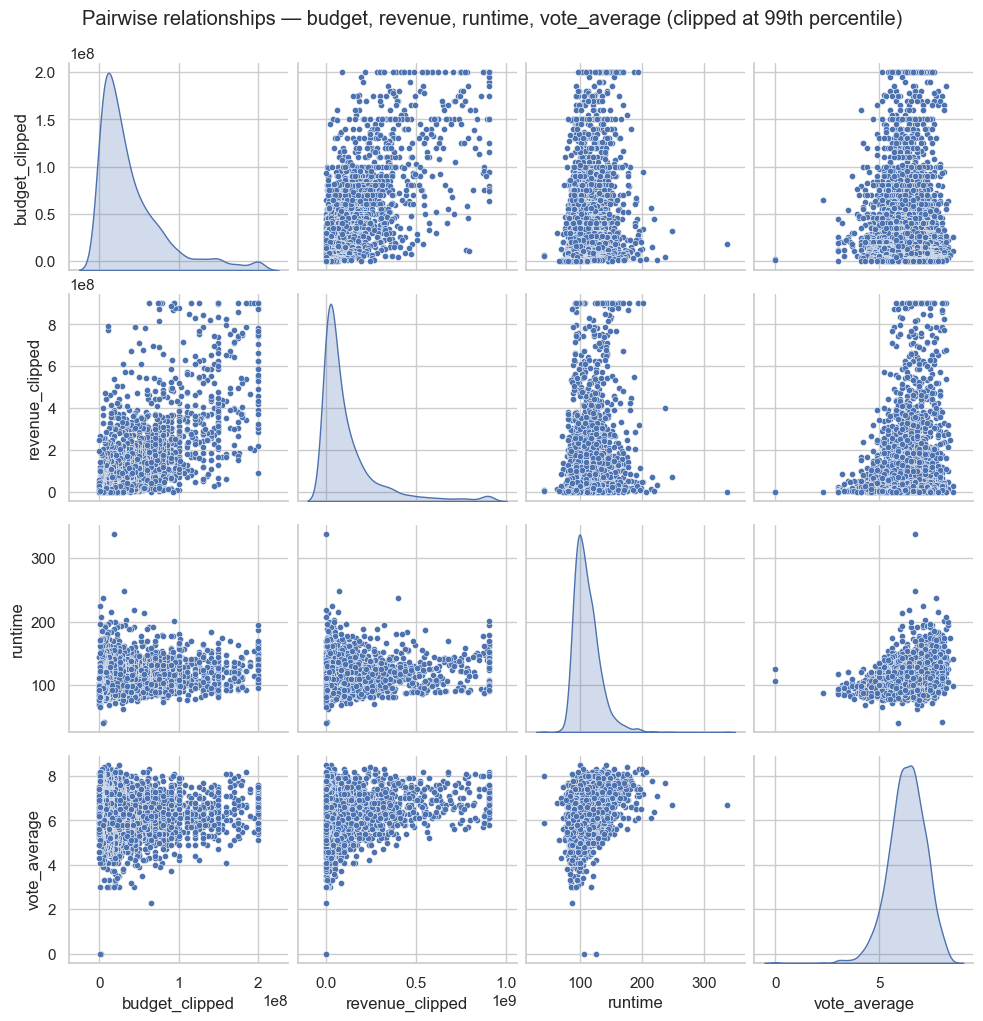

In [4]:

# Pairplot: budget, revenue, runtime, vote_average

pair_df = base[['budget', 'revenue', 'runtime', 'vote_average']].copy()
# drop rows with all-NaNs in selected columns
pair_df = pair_df.dropna(how='all')
# For plotting, clip extreme outliers by setting an upper percentile threshold for better visualization
cap_cols = ['budget', 'revenue']
for c in cap_cols:
    if c in pair_df.columns:
        upper = pair_df[c].quantile(0.99)
        pair_df[c+'_clipped'] = pair_df[c].clip(upper=upper)
# Use clipped versions if available
cols_for_plot = []
if 'budget_clipped' in pair_df.columns:
    cols_for_plot.append('budget_clipped')
else:
    cols_for_plot.append('budget')
if 'revenue_clipped' in pair_df.columns:
    cols_for_plot.append('revenue_clipped')
else:
    cols_for_plot.append('revenue')
cols_for_plot += ['runtime', 'vote_average']

sns.pairplot(pair_df[cols_for_plot].dropna(), diag_kind='kde', plot_kws={'s':20}, corner=False)
plt.suptitle("Pairwise relationships — budget, revenue, runtime, vote_average (clipped at 99th percentile)", y=1.02)


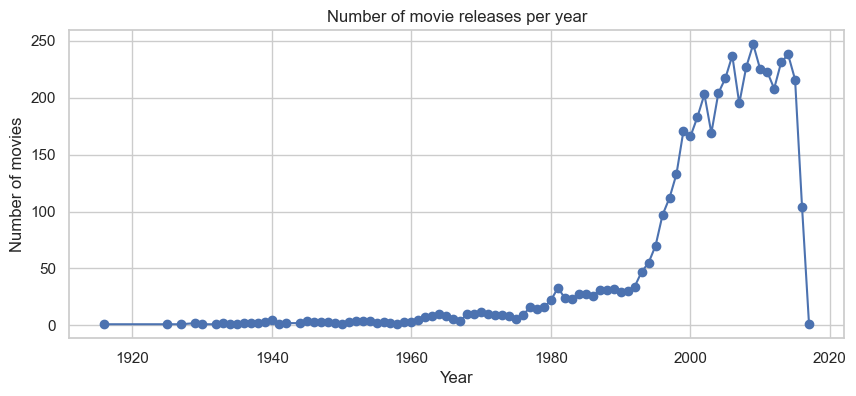

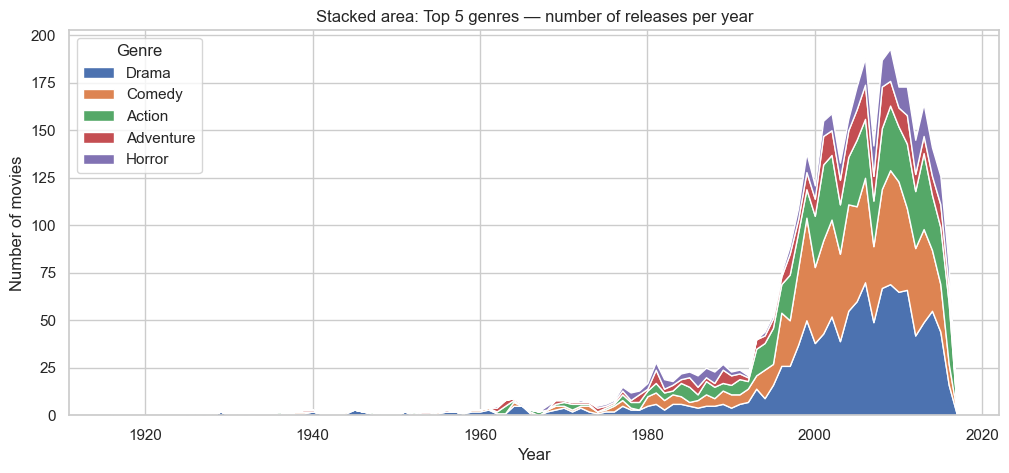

In [7]:

# Time-series: number of movie releases over years and stacked area for top 5 genres

df = base.copy()
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df['year'] = df['release_date'].dt.year
# Count releases per year
releases = df.groupby('year').size().reset_index(name='num_movies').dropna()
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(releases['year'], releases['num_movies'], marker='o')
ax.set_title("Number of movie releases per year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of movies")
ax.grid(True)
plt.show()

# Stacked area: top 5 genres by count
genre_ts = df[['year','primary_genre']].dropna()
top_genres = genre_ts['primary_genre'].value_counts().nlargest(5).index.tolist()
genre_counts = genre_ts[genre_ts['primary_genre'].isin(top_genres)].groupby(['year','primary_genre']).size().unstack(fill_value=0)
genre_counts = genre_counts.reindex(range(int(df['year'].min()), int(df['year'].max())+1), fill_value=0)
genre_counts = genre_counts[top_genres]  # ensure column order
# stacked area chart
fig, ax = plt.subplots(figsize=(12,5))
ax.stackplot(genre_counts.index, [genre_counts[g] for g in genre_counts.columns], labels=genre_counts.columns)
ax.set_title("Stacked area: Top 5 genres — number of releases per year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of movies")
ax.legend(title="Genre", loc='upper left')
plt.show()



C:\Users\Revanth\AppData\Local\Temp\ipykernel_1644\505846444.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='director', y='vote_average', data=dir_df, order=top_directors, palette=cb_palette)
C:\Users\Revanth\AppData\Local\Temp\ipykernel_1644\505846444.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.violinplot(x='director', y='vote_average', data=dir_df, order=top_directors, palette=cb_palette)


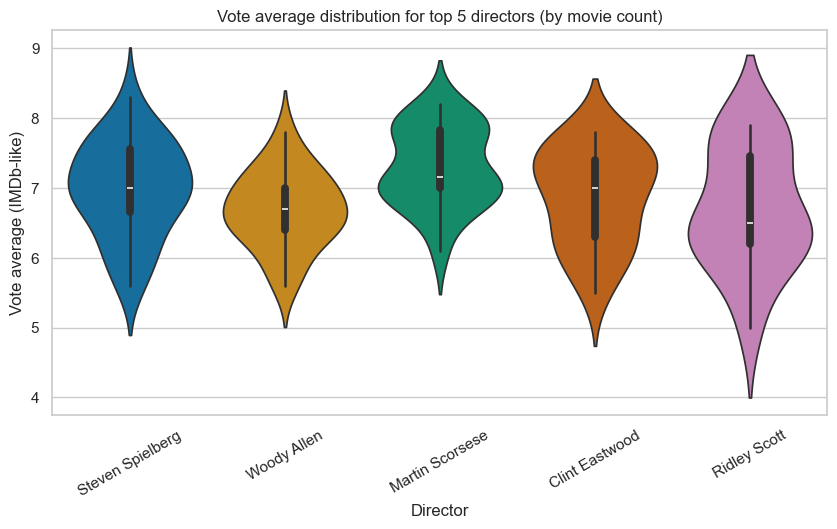

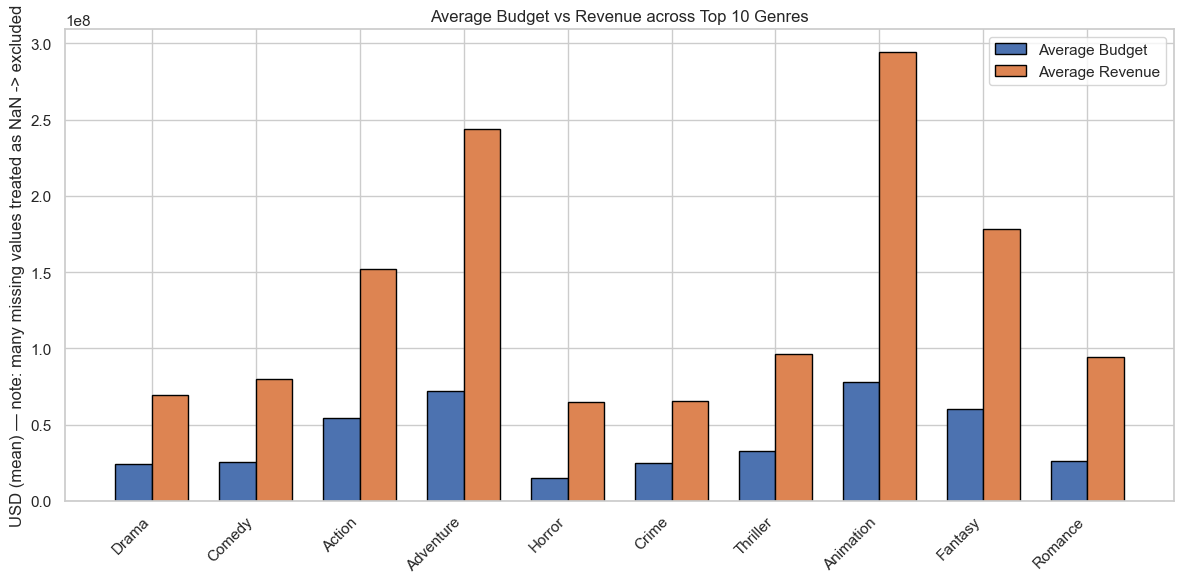

In [8]:

# Violin plot: vote_average distribution for top 5 directors by movie count

df = base.copy()
# Select top 5 directors
top_directors = df['director'].value_counts().nlargest(5).index.tolist()
dir_df = df[df['director'].isin(top_directors)]
plt.figure(figsize=(10,5))
sns.violinplot(x='director', y='vote_average', data=dir_df, order=top_directors, palette=cb_palette)
plt.title("Vote average distribution for top 5 directors (by movie count)")
plt.xlabel("Director")
plt.ylabel("Vote average (IMDb-like)")
plt.xticks(rotation=30)
plt.show()

# Bar chart comparing average revenue and budget for top 10 genres
top_genres_10 = df['primary_genre'].value_counts().nlargest(10).index.tolist()
gdf = df[df['primary_genre'].isin(top_genres_10)].copy()
agg = gdf.groupby('primary_genre').agg(avg_budget=('budget','mean'), avg_revenue=('revenue','mean'), count=('id','count')).sort_values('count', ascending=False)
agg = agg.fillna(0)
# plot side-by-side bars on same axes (two bars per genre)
ind = np.arange(len(agg))
width = 0.35
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind - width/2, agg['avg_budget'], width, label='Average Budget', edgecolor='black')
ax.bar(ind + width/2, agg['avg_revenue'], width, label='Average Revenue', edgecolor='black')
ax.set_xticks(ind)
ax.set_xticklabels(agg.index, rotation=45, ha='right')
ax.set_ylabel("USD (mean) — note: many missing values treated as NaN -> excluded")
ax.set_title("Average Budget vs Revenue across Top 10 Genres")
ax.legend()
plt.tight_layout()
plt.show()


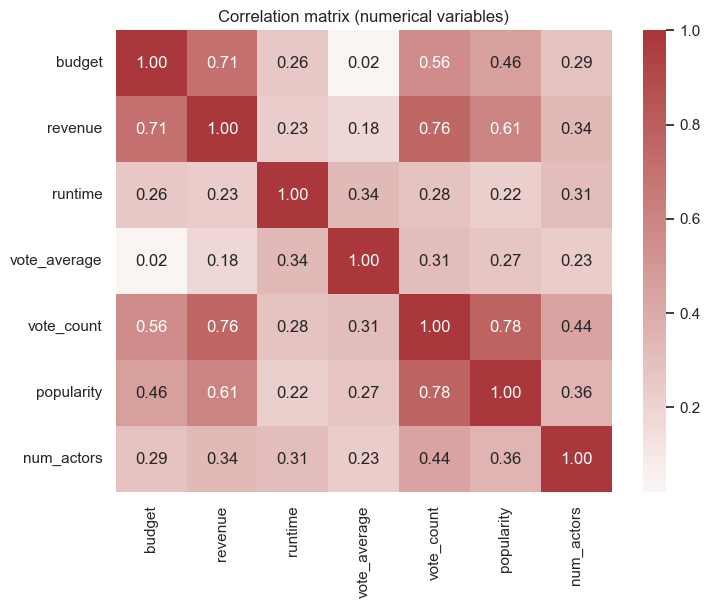

In [9]:

# Correlation matrix heatmap

num_cols = ['budget','revenue','runtime','vote_average','vote_count','popularity','num_actors']
present = [c for c in num_cols if c in base.columns]
corr_df = base[present].copy()
corr_df = corr_df.dropna(how='all')
corr = corr_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Correlation matrix (numerical variables)")
plt.show()


C:\Users\Revanth\AppData\Local\Temp\ipykernel_1644\497959029.py:12: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(data=scatter, x='budget', y='revenue', hue='primary_genre', size='vote_count', palette=cb_palette, sizes=(20,200), alpha=0.7)


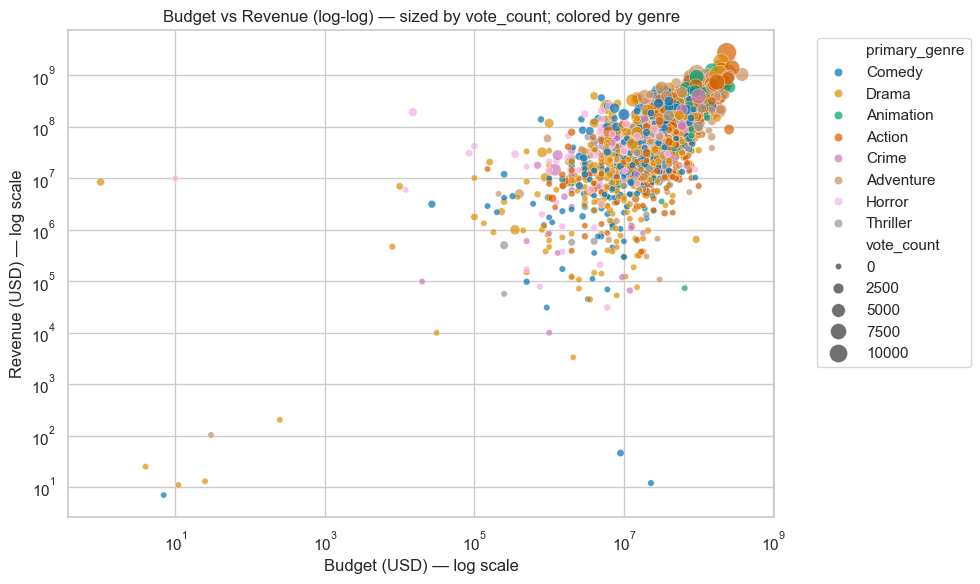

In [10]:


# Creative plot: budget -> revenue scatter with ratio, sized by vote_count, colored by primary genre

df = base.copy()
# Keep rows with both budget and revenue
scatter = df.dropna(subset=['budget','revenue','primary_genre'])
# limit to reasonable sample to keep plot readable
scatter = scatter.sample(n=min(len(scatter), 2000), random_state=42)
scatter['rev_to_budget'] = scatter['revenue'] / (scatter['budget'] + 1)
top_genres = scatter['primary_genre'].value_counts().nlargest(8).index.tolist()
scatter = scatter[scatter['primary_genre'].isin(top_genres)]
plt.figure(figsize=(10,6))
sns.scatterplot(data=scatter, x='budget', y='revenue', hue='primary_genre', size='vote_count', palette=cb_palette, sizes=(20,200), alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Budget (USD) — log scale")
plt.ylabel("Revenue (USD) — log scale")
plt.title("Budget vs Revenue (log-log) — sized by vote_count; colored by genre")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# Final Conclusions from Visualizations

### 1. Pairplot (Budget, Revenue, Runtime, Vote Average)
- Revenue tends to increase with budget (positive correlation), though with a lot of variance.  
- Higher budgets don’t guarantee higher ratings — `vote_average` is scattered and not strongly tied to budget.  
- Runtime has little correlation with revenue or ratings.

### 2. Time-Series (Releases per Year, Top 5 Genres)
- Number of movie releases has steadily increased over time.  
- Certain genres (Drama, Comedy, Action) dominate consistently, while others fluctuate.  
- Industry diversification is visible in genre trends across decades.

### 3. Violin Plot (Top 5 Directors by Movie Count)
- Directors differ in consistency of ratings.  
- Some directors have tighter distributions around high ratings, while others show more spread.  
- A few directors produce both highly rated and poorly rated films, suggesting variability in quality.

### 4. Bar Chart (Average Revenue vs Budget by Genre)
- Action and Adventure genres generally have both high budgets and high revenues.  
- Comedy and Drama often have lower budgets, but can still generate strong revenues.  
- Not all high-budget genres give high returns — highlighting risk differences across genres.

### 5. Correlation Heatmap
- Strong correlation between budget and revenue.  
- Ratings (`vote_average`) show weak correlation with budget/revenue.  
- Popularity and vote count correlate more with revenue than with ratings.

### 6. Creative Scatter Plot (Budget vs Revenue, log–log)
- Confirms a general upward trend: higher budget films often bring higher revenue.  
- Some notable outliers: low-budget films with extremely high revenue (“blockbuster sleepers”).  
- Genre coloring shows that Action/Adventure films dominate the high-budget/high-revenue cluster, while Comedy/Drama often populate mid-to-low budget ranges.

---

## Overall Story
- **Hypothesis Result:** Partially confirmed. Higher budgets **do** lead to higher revenues, but do **not** guarantee higher ratings.  
- **Key Insight:** Success in terms of revenue is strongly budget-driven, but critical/audience acclaim (ratings) depends on other factors like director consistency, story, and cast.  
- **Unexpected Finding:** Some low-budget films achieve remarkable revenues, showing that creative content and market appeal can outperform raw financial investment.  